In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import qgrid
import seaborn as sns

In [2]:
files = {"all": "../../explanations-for-ner-train-finnish-20190114-total.txt",
        "only_target_entities": "../../explanations-for-ner-train-finnish-20190115-total-only_target_entities.txt",
        "finnish_model_100_size": "explanations-for-ner-train-finnish_model_100_size.txt",
        "turkish_model_100_size": "explanations-for-ner-train-turkish_model_100_size.txt"}

In [3]:
lines = []
records = []
with open(files["turkish_model_100_size"], "r") as f:
    lines = f.readlines()
    for line in lines:
        tokens = line.strip().split("\t")
        record = [int(tokens[0]), tokens[1], tuple([int(x) for x in tokens[2].split(" ")])]
        record.append({k: float(v) for k, v in [tuple(x.split(" ")) for x in tokens[3:]]})
        records.append(record)

In [4]:
records[0]

[0,
 'ORG',
 (4, 8),
 {'Adj': 0.14135024271905186,
  'Prop': 0.07418424247924732,
  'Conj': 0.04744965562148533,
  'Adverb': -0.03637829719473306,
  'Pnon': -0.014317913059460978,
  'Nom': -0.013940142397435401,
  'Pos': -0.0059777494854647275,
  'P3sg': -0.0059777494854647275,
  'Verb': -0.0059777494854647275,
  'P2sg': -0.005977749485464727,
  'Acquire': -0.005977749485464726,
  'Num': -0.005977749485464726,
  'Dat': -0.005977749485464726,
  'Loc': -0.005977749485464726,
  'Acc': -0.005977749485464726,
  'A3pl': -0.005977749485464726,
  'Punc': -0.005977749485464726,
  'FutPart': -0.005977749485464725,
  'Nom^DB': -0.005977749485464725,
  'Verb^DB': -0.005977749485464725,
  'Pos^DB': -0.005977749485464725,
  'Fut': -0.005977749485464724,
  'Opt': -0.005977749485464723,
  'A2pl': -0.005977749485464723,
  'Reflex': -0.005977749485464723,
  'Pass': -0.005977749485464723,
  'Inf2': -0.005977749485464722,
  'Imp': -0.0059777494854647215,
  'Neg': -0.0059777494854647215,
  'FitFor': -0.005

In [5]:
list(record[3].values())

[0.0601361878027351,
 0.03373812278944572,
 0.012379514469060512,
 0.006463594811591722,
 -0.003575601495722809,
 -0.003575601495722809,
 -0.003575601495722808,
 -0.0035756014957228077,
 -0.0035756014957228077,
 -0.0035756014957228077,
 -0.003575601495722807,
 -0.0035756014957228064,
 -0.0035756014957228056,
 -0.0035756014957228047,
 -0.0035756014957228043,
 -0.0035756014957228034,
 -0.0035756014957228025,
 -0.003575601495722802,
 -0.0035756014957228016,
 -0.0035756014957228008,
 -0.0035756014957228003,
 -0.0035756014957227995,
 -0.0035756014957227995,
 -0.0035756014957227995,
 -0.003575601495722799,
 -0.003575601495722798,
 -0.0035756014957227977,
 -0.0035756014957227973,
 -0.003575601495722797,
 -0.003575601495722797,
 -0.0035756014957227947,
 -0.0035756014957227943,
 -0.003575601495722794,
 -0.003575601495722793,
 0.0017018279902966831]

In [6]:
def log_sum_exp(input_x):
    max_value = np.max(input_x)
    return np.log(np.sum([np.exp(x-max_value) for x in input_x])) + max_value

log_sum_exp([1, 2])

2.313261687518223

In [7]:
np.logaddexp(*[1, 2])

2.313261687518223

In [8]:
group_by_entity_type = {}
for record in records:
    entity_type = record[1]
    if entity_type not in group_by_entity_type:
        group_by_entity_type[entity_type] = {}
    if entity_type in group_by_entity_type:
        # sum_weights = log_sum_exp(list(record[3].values()))
#         min_value = np.min(list(record[3].values()))
#         max_value = np.max(list(record[3].values()))
        for morpho_tag, weight in record[3].items():
#             value = np.exp(weight - sum_weights)
#             value = (weight-min_value)/float(max_value-min_value)
            value = weight
            if morpho_tag in group_by_entity_type[entity_type]:
                group_by_entity_type[entity_type][morpho_tag].append(value)
            else:
                group_by_entity_type[entity_type][morpho_tag] = [value]

In [9]:
group_by_entity_type.keys()

dict_keys(['ORG', 'LOC', 'PER'])

In [10]:
group_by_entity_type['ORG'].keys()

dict_keys(['Adj', 'Prop', 'Conj', 'Adverb', 'Pnon', 'Nom', 'Pos', 'P3sg', 'Verb', 'P2sg', 'Acquire', 'Num', 'Dat', 'Loc', 'Acc', 'A3pl', 'Punc', 'FutPart', 'Nom^DB', 'Verb^DB', 'Pos^DB', 'Fut', 'Opt', 'A2pl', 'Reflex', 'Pass', 'Inf2', 'Imp', 'Neg', 'FitFor', 'Adj^DB', 'Card', 'Ins', 'Ness', 'Prog1', 'PresPart', 'A3sg', 'Noun', 'Zero', 'A1sg', 'P1sg', 'Postp', 'Caus', 'Aor^DB', 'PCNom', 'P3pl', 'Ord', 'Recip^DB', 'Pres', 'Zero^DB', 'Gen', '*UNKNOWN*', 'Loc^DB', 'Rel', 'Narr^DB', 'Narr', 'Almost', 'A2sg', 'Noun^DB', 'With', 'Equ', 'Ly', 'AsIf', 'P1pl', 'Pers', 'While', 'Since', 'Cop', 'A1pl', 'Demons', 'Pron', 'PastPart', 'PresPart^DB', 'Past', 'Inf3', 'Abl', 'Recip', 'Cond', 'Inf1', 'Prog2', 'Det', 'Agt', 'PCAbl^DB', 'Card^DB', 'WithoutHavingDoneSo', 'Ques', 'FeelLike', 'PCDat', 'With^DB', 'Neg^DB', 'PCAbl', 'Inf2^DB', 'Pass^DB', 'Aor', 'Able', 'Caus^DB', 'Related', 'Neces', 'ByDoingSo', 'Interj', 'Become^DB', 'PCIns', 'JustLike', 'PCDat^DB', 'Become', 'AsLongAs', 'Acquire^DB', 'AfterDo

In [11]:
stats_by_entity_type = {key: dict() for key in group_by_entity_type.keys()}
for entity_type in stats_by_entity_type.keys():
    for morpho_tag in group_by_entity_type[entity_type]:
        l = group_by_entity_type[entity_type][morpho_tag]
        stats_by_entity_type[entity_type][morpho_tag] = (np.mean(l), len(l))

In [12]:
for entity_type in stats_by_entity_type.keys():
    sorted_l = sorted(stats_by_entity_type[entity_type].items(), key=lambda x: np.abs(x[1][0]), reverse=True)
    print(entity_type, sorted_l[:10])

ORG [('NotState', (-3.0932136795378553, 19)), ('A3sg', (-0.9581672143727293, 6268)), ('Pnon', (-0.7555386178659622, 6267)), ('Ord^DB', (0.6141498837737837, 7)), ('Ins^DB', (-0.5173083804814412, 3)), ('Prop', (-0.5117493600139251, 5997)), ('Fut', (0.46098718684966095, 799)), ('Adv', (0.4296637193903242, 31)), ('Ly', (0.38215153433104826, 321)), ('AsIf', (0.37035562621162316, 334))]
LOC [('Nom', (5.184463225591997, 6753)), ('Pnon', (-2.3338909956086904, 6776)), ('Prop', (-1.468475720677032, 6720)), ('A3sg', (-1.2982727913292953, 6778)), ('QuesP', (-1.1571309408571573, 1)), ('Noun', (-1.057530406946456, 6778)), ('Loc', (-0.9609928371651388, 4499)), ('Neg^DB', (0.9418524745465501, 519)), ('PCAbl^DB', (0.9334877632880342, 545)), ('FitFor', (0.8812672479559663, 582))]
PER [('Noun', (18.298777731624213, 9317)), ('Reflex', (-12.099999239285633, 448)), ('PresPart^DB', (-7.002815940267375, 699)), ('Cond', (-6.936224373748793, 658)), ('With^DB', (-5.869204479824028, 827)), ('Without', (-5.4077636

In [13]:
all_morpho_tags = set()
for record in records:
    all_morpho_tags.update(set(record[3].keys()))
all_morpho_tags
morpho_tag_to_id = {m: idx for idx, m in enumerate(all_morpho_tags)}
morpho_tag_to_id

{'Prog2^DB': 0,
 'Prog1': 1,
 'Past': 2,
 'When': 3,
 'Rel^DB': 4,
 'Pass': 5,
 'Become^DB': 6,
 'PCGen': 7,
 'Acquire': 8,
 'FitFor': 9,
 'Rel': 10,
 'P1pl': 11,
 'Aor': 12,
 'P2sg': 13,
 'PCAbl': 14,
 'Noun^DB': 15,
 'Acc': 16,
 'PastPart': 17,
 'When^DB': 18,
 'Able^DB': 19,
 'Stay^DB': 20,
 'Acquire^DB': 21,
 'AsIf^DB': 22,
 'Pnon': 23,
 'P1sg': 24,
 'Verb^DB': 25,
 'Agt': 26,
 'A3sg': 27,
 'Neces': 28,
 'Dup^DB': 29,
 'Neg^DB': 30,
 'Ord^DB': 31,
 'PCNom^DB': 32,
 'Quant': 33,
 'Pres': 34,
 'Since': 35,
 'P2pl': 36,
 'Adverb': 37,
 'Caus^DB': 38,
 'Adj^DB': 39,
 'PCDat^DB': 40,
 'Num': 41,
 'PCDat': 42,
 'AfterDoingSo': 43,
 'Inf1': 44,
 'Ly': 45,
 'Det': 46,
 'ByDoingSo': 47,
 'PersP': 48,
 'Inf2^DB': 49,
 'Stay': 50,
 'Without^DB': 51,
 'Dist^DB': 52,
 'PCAcc': 53,
 'Cop': 54,
 'A1sg': 55,
 'Recip': 56,
 'Ins^DB': 57,
 'Dat^DB': 58,
 'Nom^DB': 59,
 'Dup': 60,
 'DemonsP': 61,
 'P3pl': 62,
 'A1pl': 63,
 'Postp': 64,
 'A3sg^DB': 65,
 'P3sg': 66,
 'Real': 67,
 'Demons': 68,
 'Inf3':

In [14]:
record

[25512,
 'LOC',
 (16, 17),
 {'Nom': 0.0601361878027351,
  'Pnon': 0.03373812278944572,
  'Prop': 0.012379514469060512,
  'Noun': 0.006463594811591722,
  'PCIns': -0.003575601495722809,
  'Inf1': -0.003575601495722809,
  'P1sg': -0.003575601495722808,
  'PCNom': -0.0035756014957228077,
  'Card^DB': -0.0035756014957228077,
  'Ord': -0.0035756014957228077,
  'Aor': -0.003575601495722807,
  'Agt': -0.0035756014957228064,
  'Ness': -0.0035756014957228056,
  'Ins': -0.0035756014957228047,
  'Aor^DB': -0.0035756014957228043,
  'Postp': -0.0035756014957228034,
  'Imp': -0.0035756014957228025,
  'Adj^DB': -0.003575601495722802,
  'Conj': -0.0035756014957228016,
  'Inf2': -0.0035756014957228008,
  'Num': -0.0035756014957228003,
  'Dat': -0.0035756014957227995,
  'Loc': -0.0035756014957227995,
  'Adverb': -0.0035756014957227995,
  'Zero': -0.003575601495722799,
  'Nom^DB': -0.003575601495722798,
  'Punc': -0.0035756014957227977,
  'P3sg': -0.0035756014957227973,
  'A3pl': -0.003575601495722797,
 

In [15]:
records_for_panda = []
for record in records:
    record_pre_panda = [record[0], record[1], record[2][0], record[2][1]]
    morpho_tags = [None] * len(morpho_tag_to_id)
    for morpho_tag, idx in morpho_tag_to_id.items():
        if morpho_tag in record[3]:
            morpho_tags[idx] = record[3][morpho_tag]
    record_pre_panda += morpho_tags
    records_for_panda.append(record_pre_panda)
#     print(record_pre_panda)

In [16]:
id_to_morpho_tag = {idx: morpho_tag for morpho_tag, idx in morpho_tag_to_id.items()}
column_names = ['sentence_idx', 'entity_type', 'entity_start', 'entity_end']
column_names += [id_to_morpho_tag[x] for x in range(len(morpho_tag_to_id))]
explanations = pd.DataFrame(records_for_panda, columns=column_names)

In [17]:
explanations

,sentence_idx,entity_type,entity_start,entity_end,Prog2^DB,Prog1,Past,When,Rel^DB,Pass,...,Dat,Loc,PCIns,Gen^DB,Neg,Imp,Reflex,A2pl,*UNKNOWN*,Card^DB
0,0,ORG,4,8,NaN,-0.005978,NaN,NaN,NaN,-0.005978,...,-0.005978,-0.005978,NaN,NaN,-0.005978,-0.005978,-0.005978,-0.005978,NaN,NaN
1,0,LOC,11,12,NaN,-0.001367,NaN,NaN,NaN,-0.001367,...,-0.001367,-0.001367,NaN,NaN,-0.001367,-0.001367,-0.001367,-0.001367,NaN,NaN
2,3,LOC,43,48,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002843,0.004317,NaN,NaN,NaN,0.002843,NaN,0.002843,NaN,0.002843
3,5,LOC,0,1,NaN,-0.075067,NaN,NaN,NaN,NaN,...,-0.075067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10,ORG,0,1,NaN,NaN,NaN,NaN,NaN,NaN,...,0.026038,0.026038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10,LOC,12,13,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.003364,-0.003364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10,LOC,14,15,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.001528,-0.001528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10,LOC,16,17,NaN,NaN,NaN,NaN,NaN,NaN,...,0.007959,0.040515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,11,LOC,4,5,NaN,NaN,NaN,NaN,NaN,-0.002572,...,-0.002572,-0.002572,NaN,NaN,NaN,NaN,NaN,NaN,-0.002572,NaN
9,11,LOC,6,7,NaN,NaN,NaN,NaN,NaN,0.014979,...,0.014979,0.022581,NaN,NaN,NaN,NaN,NaN,NaN,0.014979,NaN


In [18]:
df_by_entity_type = explanations.groupby('entity_type')

In [19]:
df_by_entity_type['Loc'].mean()

entity_type
LOC   -0.960993
ORG    0.142319
PER   -0.364589
Name: Loc, dtype: float64

In [20]:
explanations.drop(['sentence_idx', 'entity_start', 'entity_end'], axis=1).groupby('entity_type').mean()

,Prog2^DB,Prog1,Past,When,Rel^DB,Pass,Become^DB,PCGen,Acquire,FitFor,...,Dat,Loc,PCIns,Gen^DB,Neg,Imp,Reflex,A2pl,*UNKNOWN*,Card^DB
entity_type,,,,,,,,,,,,,,,,,,,,,
LOC,0.003631,-0.009486,0.174483,0.016830,0.007046,0.212877,-0.034744,0.045384,0.611387,0.881267,...,0.183358,-0.960993,0.016630,0.118045,0.120066,0.177874,-0.006950,-0.027162,-0.024022,-0.018327
ORG,0.001524,0.068743,0.068128,0.020234,-0.071165,0.153713,0.063866,0.004385,0.144666,-0.046087,...,0.146529,0.142319,-0.011364,-0.030582,0.004690,0.057230,0.133542,0.081365,-0.095470,0.037074
PER,0.012850,-0.706530,-1.551409,-0.450985,0.759215,-0.045546,2.421241,-0.028378,0.047074,-0.231421,...,-1.061265,-0.364589,0.225241,-0.613160,-0.173254,-0.491651,-12.099999,-0.176291,1.410335,-1.153057


In [21]:
means_over_entity_type = explanations.drop(['sentence_idx', 'entity_start', 'entity_end'], axis=1).groupby('entity_type').mean()

In [22]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c2448d0>]],
      dtype=object)

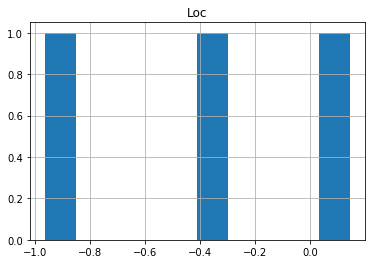

In [23]:
means_over_entity_type.hist(['Loc'])

In [24]:
means_over_entity_type.corr()

,Prog2^DB,Prog1,Past,When,Rel^DB,Pass,Become^DB,PCGen,Acquire,FitFor,...,Dat,Loc,PCIns,Gen^DB,Neg,Imp,Reflex,A2pl,*UNKNOWN*,Card^DB
Prog2^DB,1.000000,-0.996475,-0.973491,-0.985672,0.995919,-0.922599,0.977774,-0.722258,-0.488474,-0.482854,...,-0.979714,-0.128606,0.997737,-0.932596,-0.838201,-0.940868,-0.986293,-0.967129,0.991076,-0.990967
Prog1,-0.996475,1.000000,0.989247,0.996348,-0.999980,0.951709,-0.991916,0.777733,0.559954,0.554616,...,0.993073,0.044957,-0.999860,0.959587,0.880998,0.965972,0.996659,0.942388,-0.998765,0.998724
Past,-0.973491,0.989247,1.000000,0.998123,-0.990160,0.986375,-0.999809,0.861304,0.675107,0.670351,...,0.999579,-0.101631,-0.986666,0.990426,0.940720,0.993413,0.997888,0.883330,-0.995292,0.995371
When,-0.985672,0.996348,0.998123,1.000000,-0.996872,0.974448,-0.999129,0.828567,0.628655,0.623643,...,0.999479,-0.040509,-0.994782,0.980112,0.918179,0.984529,0.999993,0.910382,-0.999360,0.999389
Rel^DB,0.995919,-0.999980,-0.990160,-0.996872,1.000000,-0.953648,0.992705,-0.781728,-0.565228,-0.559914,...,-0.993802,-0.038584,0.999733,-0.961363,-0.883998,-0.967602,-0.997160,-0.940234,0.999062,-0.999026
Pass,-0.922599,0.951709,0.986375,0.974448,-0.953648,1.000000,-0.982973,0.933155,0.787271,0.783291,...,0.981190,-0.263904,-0.946447,0.999642,0.983702,0.998729,0.973604,0.794180,-0.965787,0.965998
Become^DB,0.977774,-0.991916,-0.999809,-0.999129,0.992705,-0.982973,1.000000,-0.851213,-0.660564,-0.655725,...,-0.999955,0.082175,0.989657,-0.987540,-0.933913,-0.990984,-0.998966,-0.892320,0.996996,-0.997058
PCGen,-0.722258,0.777733,0.861304,0.828567,-0.781728,0.933155,-0.851213,1.000000,0.956300,0.954401,...,0.846207,-0.592994,-0.767122,0.923197,0.982582,0.913853,0.826476,0.522647,-0.808004,0.808484
Acquire,-0.488474,0.559954,0.675107,0.628655,-0.565228,0.787271,-0.660564,0.956300,1.000000,0.999979,...,0.653429,-0.802512,-0.546033,0.770481,0.885310,0.755195,0.625754,0.250534,-0.600427,0.601078
FitFor,-0.482854,0.554616,0.670351,0.623643,-0.559914,0.783291,-0.655725,0.954401,0.999979,1.000000,...,0.648549,-0.806331,-0.540636,0.766367,0.882302,0.750966,0.620727,0.244305,-0.595274,0.595928


In [25]:
means_over_entity_type['Ins^DB'].mean()

-0.22731172652098217

In [26]:
means_over_entity_type[means_over_entity_type.columns[0]].mean()

0.006001634505573487

In [27]:
explanations_grid = qgrid.show_grid(means_over_entity_type.corr().iloc[:, 0:2], show_toolbar=True)
explanations_grid

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [28]:
df_by_entity_type = explanations.drop(['sentence_idx', 'entity_start', 'entity_end'], axis=1).groupby('entity_type')

In [29]:
explanations[explanations['entity_type'] == "LOC"]

,sentence_idx,entity_type,entity_start,entity_end,Prog2^DB,Prog1,Past,When,Rel^DB,Pass,...,Dat,Loc,PCIns,Gen^DB,Neg,Imp,Reflex,A2pl,*UNKNOWN*,Card^DB
1,0,LOC,11,12,NaN,-0.001367,NaN,NaN,NaN,-0.001367,...,-0.001367,-0.001367,NaN,NaN,-0.001367,-0.001367,-0.001367,-0.001367,NaN,NaN
2,3,LOC,43,48,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002843,0.004317,NaN,NaN,NaN,0.002843,NaN,0.002843,NaN,0.002843
3,5,LOC,0,1,NaN,-0.075067,NaN,NaN,NaN,NaN,...,-0.075067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,10,LOC,12,13,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.003364,-0.003364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10,LOC,14,15,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.001528,-0.001528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10,LOC,16,17,NaN,NaN,NaN,NaN,NaN,NaN,...,0.007959,0.040515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,11,LOC,4,5,NaN,NaN,NaN,NaN,NaN,-0.002572,...,-0.002572,-0.002572,NaN,NaN,NaN,NaN,NaN,NaN,-0.002572,NaN
9,11,LOC,6,7,NaN,NaN,NaN,NaN,NaN,0.014979,...,0.014979,0.022581,NaN,NaN,NaN,NaN,NaN,NaN,0.014979,NaN
13,18,LOC,3,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,38,LOC,2,3,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.009244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
loc_group_explanations = explanations[explanations['entity_type'] == "LOC"].drop(["sentence_idx", "entity_type", "entity_start", "entity_end"], axis=1)

In [31]:
loc_group_explanations['Loc'].clip(lower=-1.0, upper=1, inplace=False)

1       -0.001367
2        0.004317
3             NaN
5       -0.003364
6       -0.001528
7        0.040515
8       -0.002572
9        0.022581
13            NaN
15            NaN
16       0.000753
20      -0.649441
21            NaN
22            NaN
24       0.012908
27            NaN
29            NaN
32       0.003196
33       0.000507
35       0.008705
37            NaN
44            NaN
45            NaN
47       0.047701
56       0.004561
59            NaN
61       0.255908
62            NaN
66      -0.037382
69       0.023992
           ...   
22244         NaN
22251    0.833541
22254   -0.095767
22257    0.033170
22260         NaN
22268         NaN
22275   -0.044605
22276    0.002518
22277         NaN
22280         NaN
22281         NaN
22282   -0.000644
22288         NaN
22290         NaN
22298         NaN
22305    0.003999
22315    0.001106
22319    0.035715
22326    0.001685
22332   -0.035172
22333   -0.005111
22338   -0.005728
22352    0.065392
22354    0.048839
22355    0

In [32]:
len(morpho_tag_to_id)

162

In [33]:
loc_group_explanations.size

1098036

In [ ]:
for idx, morpho_tag in enumerate(list(morpho_tag_to_id.keys())):
    if idx % 9 == 0:
        fig = plt.figure(int(idx/9))
    rem = idx % 9
    plt.subplot(3, 3, rem+1)
    print(morpho_tag)
#     sns.violinplot(data=list(loc_group_explanations[morpho_tag].clip(lower=-0.5, upper=0.5)))
    data = loc_group_explanations[morpho_tag].dropna().clip(lower=-0.5, upper=0.5)
    print(data)
    if data.size > 0:
        sns.distplot(data)
plt.show()

In [34]:
loc_group_explanations

,Prog2^DB,Prog1,Past,When,Rel^DB,Pass,Become^DB,PCGen,Acquire,FitFor,...,Dat,Loc,PCIns,Gen^DB,Neg,Imp,Reflex,A2pl,*UNKNOWN*,Card^DB
1,NaN,-0.001367,NaN,NaN,NaN,-0.001367,NaN,NaN,-0.001367,-0.001367,...,-0.001367,-0.001367,NaN,NaN,-0.001367,-0.001367,-0.001367,-0.001367,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.002843,0.004317,NaN,NaN,NaN,0.002843,NaN,0.002843,NaN,0.002843
3,NaN,-0.075067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.075067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.003364,-0.003364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.001528,-0.001528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.007959,0.040515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,-0.002572,NaN,NaN,-0.002572,NaN,...,-0.002572,-0.002572,NaN,NaN,NaN,NaN,NaN,NaN,-0.002572,NaN
9,NaN,NaN,NaN,NaN,NaN,0.014979,NaN,NaN,0.014979,NaN,...,0.014979,0.022581,NaN,NaN,NaN,NaN,NaN,NaN,0.014979,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.009244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
mean_loc_group_explanations = loc_group_explanations.mean()

In [36]:
mean_loc_group_explanations.sort_values(ascending=False)

Nom         5.184463
Neg^DB      0.941852
PCAbl^DB    0.933488
FitFor      0.881267
Loc^DB      0.834774
Inf2^DB     0.642318
Fut         0.642238
Acquire     0.611387
Zero^DB     0.480813
Agt         0.478840
Aor         0.469110
FutPart     0.452534
Demons      0.361712
DemonsP     0.343376
Ness        0.322181
PersP       0.320356
Ins         0.320210
PastPart    0.315523
Aor^DB      0.311594
Dup         0.306273
Inf2        0.281481
Gen         0.281190
PresPart    0.264390
Almost      0.252771
Pron        0.243985
P3pl        0.237576
Pass        0.212877
A2sg        0.210086
Conj        0.185080
Dat         0.183358
              ...   
Pers       -0.062631
Real^DB    -0.066083
Since      -0.066219
Real       -0.070259
AsIf^DB    -0.073828
Adv        -0.074292
JustLike   -0.076849
With^DB    -0.081816
Related    -0.099760
Neces      -0.108246
NotState   -0.122421
Pass^DB    -0.122983
Time       -0.136387
Narr       -0.141187
PCAcc      -0.144352
Ord        -0.170435
Narr^DB    -0

In [37]:
loc_group_explanations['Loc'].sort_values()[:10]

16943   -4413.326015
9183     -295.376159
2615      -80.089257
20407     -64.230465
1077      -49.891858
15206     -28.694943
351       -28.480559
4277      -21.574386
8534      -21.159570
18421     -20.044617
Name: Loc, dtype: float64

In [38]:
loc_group_explanations['Loc'].sort_values(ascending=False)[:10]

14021    269.554211
11353    170.003643
8556     164.870546
11406     80.676159
7300      60.786034
15275     45.019494
14031     34.603791
21664     27.772679
9818      27.628468
13050     24.443977
Name: Loc, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x138bc1470>]],
      dtype=object)

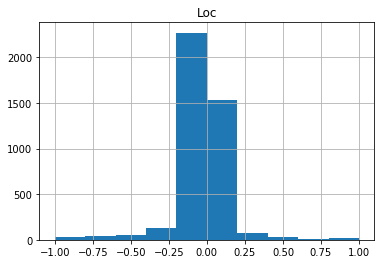

In [41]:
loc_group_explanations.hist(['Loc'], range=[-1, 1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1392e9630>]],
      dtype=object)

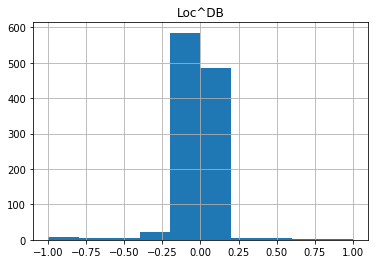

In [42]:
loc_group_explanations.hist(['Loc^DB'], range=[-1, 1])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13930bcf8>]],
      dtype=object)

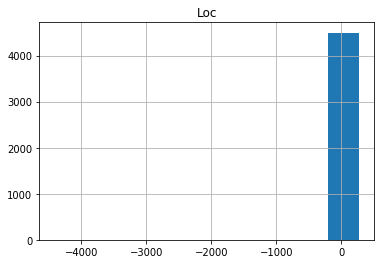

In [43]:
loc_group_explanations.hist(['Loc'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1393f8828>]],
      dtype=object)

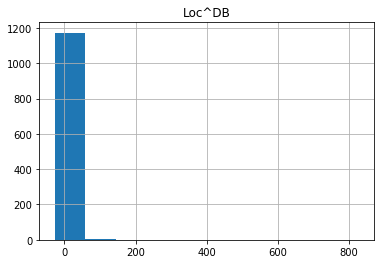

In [44]:
loc_group_explanations.hist(['Loc^DB'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x139c4bda0>]],
      dtype=object)

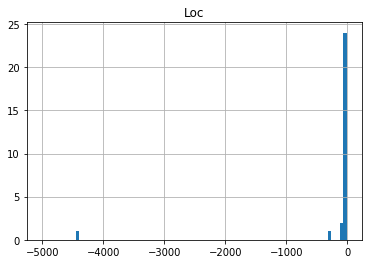

In [52]:
loc_group_explanations.hist(['Loc'], range=[-5000, -10], bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x139e29668>]],
      dtype=object)

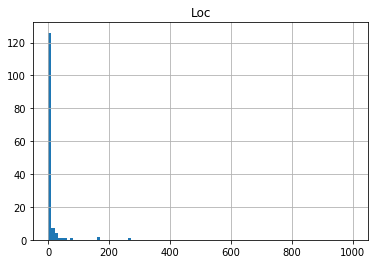

In [53]:
loc_group_explanations.hist(['Loc'], range=[1, 1000], bins=100)

In [55]:
loc_group_explanations['Loc'][loc_group_explanations['Loc'] < 0].count()

2681

In [56]:
loc_group_explanations['Loc'][loc_group_explanations['Loc'] >= 0].count()

1818

In [57]:
for morpho_tag in ['Loc', 'Loc^DB']:
    below_zero = loc_group_explanations[morpho_tag][loc_group_explanations[morpho_tag] < 0].count()
    above_zero = loc_group_explanations[morpho_tag][loc_group_explanations[morpho_tag] >= 0].count()
    print(morpho_tag, below_zero, above_zero)

Loc 2681 1818
Loc^DB 653 523


In [ ]:
!pwd

In [ ]:
!ls ../../explanations-for-ner-train-finnish-201901*